In [1]:
%pylab inline
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip3 install opencv-python

In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
import cv2


In [6]:
data = pandas.read_json(r'C:\Users\HP\Documents\cmpt 459 Kaggle\two_sigma\train.json')

In [7]:
data.head()
# dir(data)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


# Finding number of missing values in each column

In [5]:
countFeatures = 0
for row in data.features:
    if not row:
        countFeatures += 1
print('Features missing: ', countFeatures)

# Building ID
countBuildingID = 0
for row in data.building_id:
    if row == '0':
        countBuildingID += 1
print('BuildingID missing: ', countBuildingID)

#descriptions missing
countDescription = 0
for row in data.description:
    if row.isspace() or not row:
        countDescription += 1
print('Descriptions missing: ', countDescription)

# bathrooms missing
countBathrooms = 0
for row in data.bathrooms:
    if not row:
        countBathrooms += 1
print('Bathroom missing: ', countBathrooms)

# bedroom misisng
countBedrooms = 0
for row, desrow in zip(data.bedrooms, data.description):
#     desrow.lower()
    if not row and (("studio" not in desrow) and ("STUDIO" not in desrow) and ("Studio" not in desrow)) :
#         print(desrow)
        countBedrooms += 1
print('Bedrooms missing: ', countBedrooms)

# Missing created
countCreated = 0
for row in data.created:
    if not row:
        countCreated += 1
print('Created missing: ', countCreated)

# Display address missing
countDisplayID = 0
for row in data.display_address:
    if row.isspace() or not row:
        countDisplayID += 1
print('Display missing: ', countDisplayID)

#latitude missing
countLat = 0
for row in data.latitude:
    if not row:
        countLat += 1
print('Latitude missing: ', countLat)

#longitude missing
countLong = 0
for row in data.longitude:
    if not row:
        countLong += 1
print('Longitude missing: ', countLong)

#listing id missing
countListingID = 0
for row in data.listing_id:
    if not row:
        countListingID += 1
print('Listing missing: ', countListingID)


# missing manager id
countManagerID = 0
for row in data.manager_id:
    if not row:
        countManagerID += 1
print('Missing managerID: ', countManagerID)

# missing price
countPrice = 0
for row in data.price:
    if not row:
        countPrice += 1
print('price missing: ', countPrice)

#missing street variable
countStreet = 0
for row in data.street_address:
    if row.isspace() or not row:
        countStreet += 1
print('missing street: ', countStreet)

# missing interest levels
countInterest = 0
for row in data.interest_level:
    if not row:
        countInterest += 1
print('Missing interest: ', countInterest)

#missing photos
countPhotos = 0
for row in data.photos:
    if not row:
        countPhotos += 1
print('Missing photos: ', countPhotos)

Features missing:  3218
BuildingID missing:  8286
Descriptions missing:  3333
Bathroom missing:  313
Bedrooms missing:  3149
Created missing:  0
Display missing:  137
Latitude missing:  12
Longitude missing:  12
Listing missing:  0
Missing managerID:  0
price missing:  0
missing street:  10
Missing interest:  0
Missing photos:  3615


# Mapping long and lat using 95th percentile of those values

(40.7, 41)

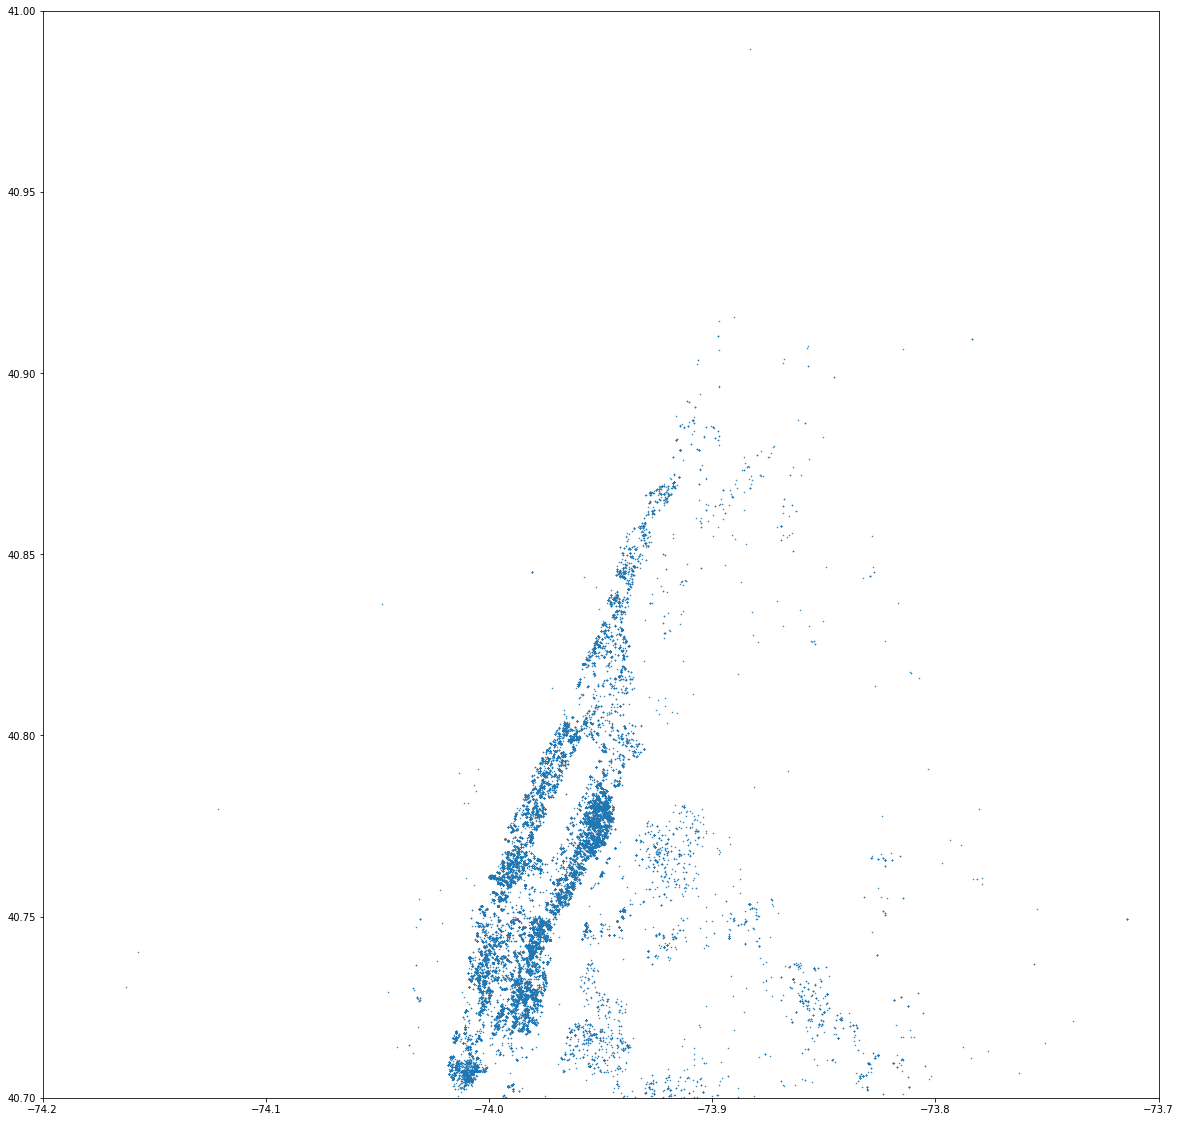

In [10]:
figure(figsize=(20,20))
plot(data['longitude'], data['latitude'], '.', ms=1)
xlim(-74.2, -73.7)
ylim(40.7, 41)

# Box plot of price, lat and long to demonstrate outliers

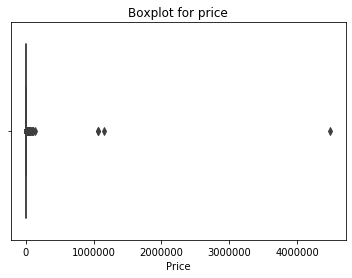

In [89]:
priceBP = seaborn.boxplot(x=data['price'])
priceBP.set(xlabel='Price', title='Boxplot for price')
plt.show()
# xlim(0, 17000)

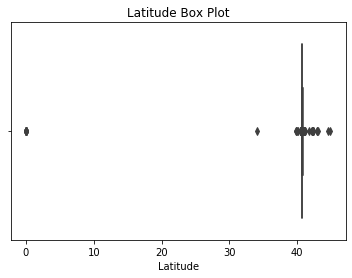

In [90]:
latBP = seaborn.boxplot(x=data['latitude'])
latBP.set(xlabel='Latitude', title='Latitude Box Plot')
plt.show()


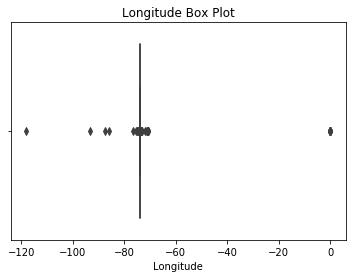

In [91]:
lonBP = seaborn.boxplot(x=data['longitude'])
lonBP.set(xlabel='Longitude', title='Longitude Box Plot')
plt.show()

# box plots for outlier visualizations for other variables

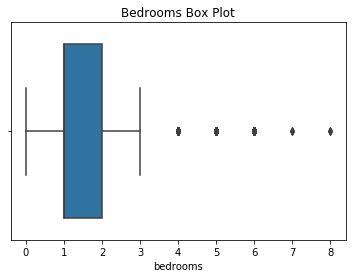

In [92]:
bedBP = seaborn.boxplot(x=data['bedrooms'])
bedBP.set(xlabel='bedrooms', title='Bedrooms Box Plot')
plt.show()

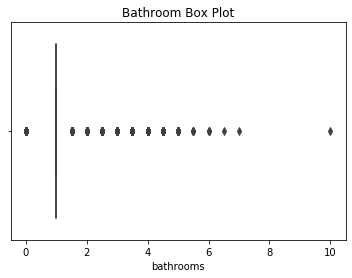

In [93]:
bathBP = seaborn.boxplot(x=data['bathrooms'])
bathBP.set(xlabel='bathrooms', title='Bathroom Box Plot')
plt.show()

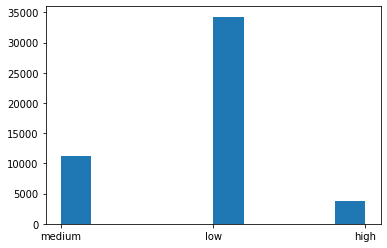

In [56]:
plt.hist(data['interest_level'])
plt.show()

# Converting 'created' column from object to datetime 

In [61]:
data['created'] = data['created'].map(pandas.to_datetime)

In [62]:
def get_hour(dt):
    return dt.hour
# creating a new hour column
data['hour'] = data['created'].map(get_hour)

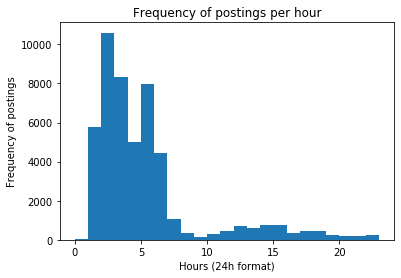

In [75]:
plt.hist(data.hour, bins=np.arange(data.hour.min(), data.hour.max()+1))
plt.xlabel("Hours (24h format)")
plt.ylabel("Frequency of postings")
plt.title("Frequency of postings per hour")
plt.show()

# Busiest hours for posting

In [63]:
data['hour'].value_counts()

2     10596
3      8318
5      7954
1      5749
4      5021
6      4446
7      1047
14      782
15      753
12      693
13      616
18      450
11      444
17      443
16      370
8       336
10      284
19      266
20      191
21      178
22      139
9       135
23       86
0        55
Name: hour, dtype: int64

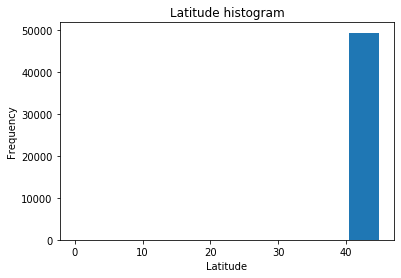

In [71]:
plt.hist(data.latitude)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Latitude histogram")
plt.show()

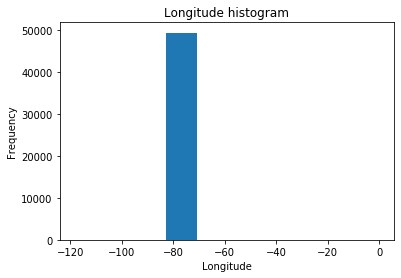

In [72]:
plt.hist(data.longitude)
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.title("Longitude histogram")
plt.show()

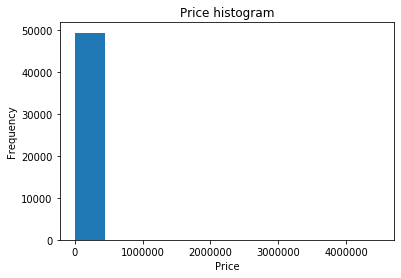

In [73]:
plt.hist(data.price)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price histogram")
plt.show()

# Removing outliers for pretty visualization

In [9]:
lower_bound = 0.05
upper_bound = 0.95

In [77]:
res = data.longitude.quantile([lower_bound, upper_bound])
true_index = (res.loc[lower_bound] < data.longitude.values) & (data.longitude.values < res.loc[upper_bound])
true_index
data.longitude[true_index]

4        -73.9539
6        -73.9722
9        -73.9625
10       -73.9425
15       -73.9743
           ...   
124000   -73.9396
124002   -73.9578
124004   -73.9554
124008   -74.0017
124009   -73.9712
Name: longitude, Length: 44278, dtype: float64

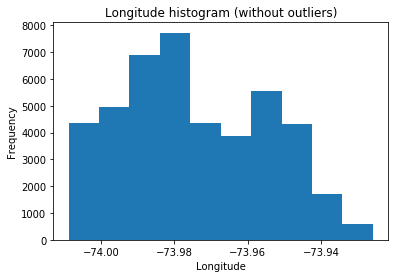

In [79]:
plt.hist(data.longitude[true_index])
plt.xlabel("Longitude")
plt.ylabel("Frequency")
plt.title("Longitude histogram (without outliers)")
plt.show()

In [10]:
res = data.latitude.quantile([lower_bound, upper_bound])
res
true_index = (res.loc[lower_bound] < data.latitude.values) & (data.latitude.values < res.loc[upper_bound])
data.latitude[true_index]

0.05    40.6887
0.95    40.8196
Name: latitude, dtype: float64

In [12]:
true_index = (data.bathrooms.values > 5)
data[true_index]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
13701,6.0,5,27531221dd5b7a63504847f7aafe45bb,2016-06-03 02:10:23,Stately 5-story townhouse residence on East 67...,East 67th Street,"[Fireplace, Doorman, Elevator, Dogs Allowed, C...",40.7657,7101290,-73.9614,df7d8f04e475b5f1a34b45509b14bd70,[https://photos.renthop.com/2/7101290_ea1c58ff...,45000,240 East 67th Street,low
26937,6.5,7,3be1175591e290053aa6997ac8f4e3bb,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,"[Garage, Garden, Doorman]",40.8336,7198431,-74.2160,1d019cccf631394cd7f2aba471a54ca4,[https://photos.renthop.com/2/7198431_70d9d8ff...,14500,206 Upper Mountain Avenu,low
30788,6.0,5,1c2f695696013f4068f89619d06b174f,2016-06-01 02:14:51,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",40.7603,7088146,-73.9610,161a1a797a1e57f6ba979447a0eadf94,[https://photos.renthop.com/2/7088146_9c0380cd...,28000,401 East 60th Street,low
35053,5.5,5,ce6d18bf3238e668b2bf23f4110b7b67,2016-06-16 08:19:54,Enjoy your own private elevator up to this ama...,John St.,"[Roof Deck, Dining Room, Doorman, Elevator, Fi...",40.7081,7173184,-74.0065,5314d4635a5d2d0ce5af039d5982b200,[https://photos.renthop.com/2/7173184_b615247f...,16500,100 John St.,low
52189,5.5,4,2094beb4097c7f56670afba5b01b31a4,2016-05-08 02:23:58,1 OF A KIND....Luxury PENTHOUSE Duplex with ma...,E 39th St.,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",40.7479,6981983,-73.9746,c9c33695ee2a2f818e9f1d8f7d1c4b39,[https://photos.renthop.com/2/6981983_6022bde4...,30000,240 E 39th St.,low
66485,5.5,5,2094beb4097c7f56670afba5b01b31a4,2016-05-20 06:32:57,"No Fee! Massive renovated 4,000sf 5bed/5.5bath...",East 39th Street,"[Fireplace, Swimming Pool, Roof Deck, Dining R...",40.7479,7044457,-73.9746,d024c48f43195c6c978a8f51aa46715c,[https://photos.renthop.com/2/7044457_eafd4e40...,25000,240 East 39th Street,low
79611,6.0,5,1c2f695696013f4068f89619d06b174f,2016-05-02 02:12:06,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",40.7603,6952330,-73.9610,c8e5586edfdb8fd3cdc6f9c3a9bf4678,[https://photos.renthop.com/2/6952330_ca372c6f...,28000,401 East 60th Street,low
84566,7.0,5,0,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,[],40.7335,6840943,-73.9974,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6840943_7f4b82cf...,60000,47th West 9th St,low
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street,low
96387,5.5,4,2094beb4097c7f56670afba5b01b31a4,2016-04-05 03:28:02,1 OF A KIND....Luxury PENTHOUSE Duplex with ma...,E 39th St.,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",40.7479,6824508,-73.9746,c9c33695ee2a2f818e9f1d8f7d1c4b39,[https://photos.renthop.com/2/6824508_125396ce...,30000,240 E 39th St.,low


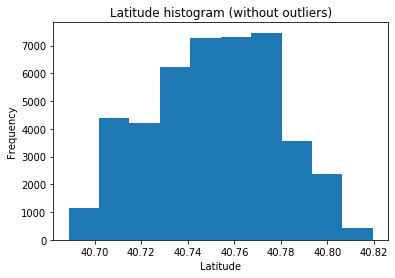

In [82]:
plt.hist(data.latitude[true_index])
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Latitude histogram (without outliers)")
plt.show()

In [86]:
res = data.price.quantile([lower_bound, upper_bound])
true_index = (res.loc[lower_bound] < data.price.values) & (data.price.values < res.loc[upper_bound])
data.price[true_index]


4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 44272, dtype: int64

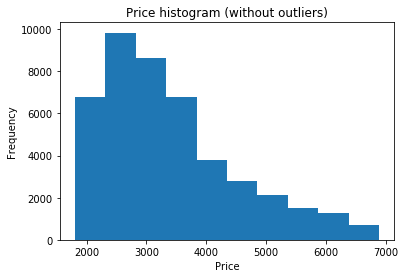

In [87]:
plt.hist(data.price[true_index])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price histogram (without outliers)")
plt.show()


# image processing

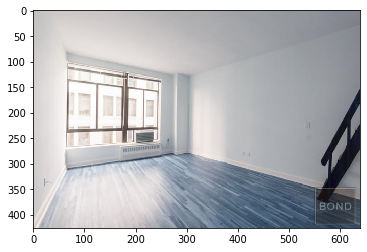

In [11]:
imgPath = '/Users/Home/Desktop/CMPT 459/projectDataset/images_sample/6811957/6811957_3dad56e8bf3477b2900ca39d57df041e.jpg'
img = cv2.imread(imgPath)
imshow(img)

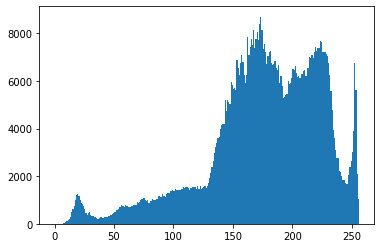

In [20]:
imgHist = cv2.calcHist([img], [0], None, [256],[0,256])
# imgHist
plt.hist(img.ravel(), 256, [0,256])
plt.show()

In [40]:
pixel, frqCount = np.unique(img, return_counts=True)
# plt.hist(frqCount)
# plt.show()
# np.unique(img, return_counts=True)

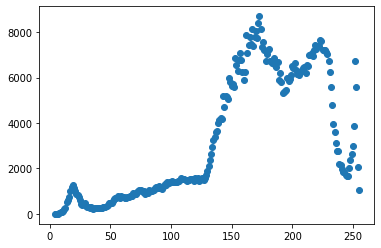

In [39]:
plt.scatter(x=pixel, y=frqCount)
plt.show()

# Feature extraction & processing

In [54]:
imgDf = pandas.DataFrame({'pixel': pixel, 'frq':frqCount})
# imgDf['pixel'].value_counts()
imgDf.head(5)
# np.amin(imgDf.pixel)

,pixel,frq
0,4,2
1,5,6
2,6,8
3,7,20
4,8,49


In [67]:
data.features[4]

['Dining Room',
 'Pre-War',
 'Laundry in Building',
 'Dishwasher',
 'Hardwood Floors',
 'Dogs Allowed',
 'Cats Allowed']

In [66]:
len(data.features[4])

7

In [82]:
data['feature_len'] = data.features.apply(len)
data.head(0)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour,feature_len


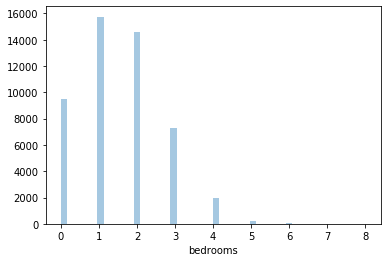

In [72]:
seaborn.distplot(data['bedrooms'],kde=False)

# Does the number of features affect the interest levels? Doesn't seem it like

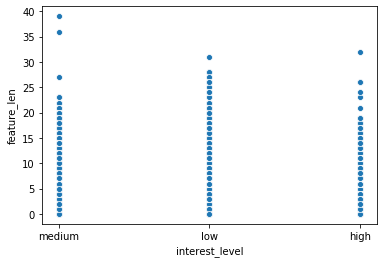

In [87]:
seaborn.scatterplot(x='interest_level', y='feature_len', data=data)
# ylim(0, 10000)
# x.set(xlabel='int', title='Boxplot for price')

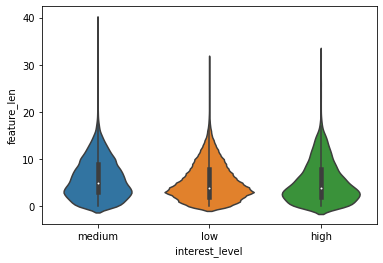

In [88]:
seaborn.violinplot(x='interest_level', y='feature_len', data=data)

In [92]:
data.feature_len.value_counts()

3     6211
4     5459
2     4938
5     4547
1     4340
6     3835
7     3374
0     3218
8     2840
9     2453
10    2217
11    1681
12    1377
13    1009
14     737
15     456
16     283
17     161
18      89
19      45
20      24
21      14
22      13
26       8
23       6
24       5
28       3
27       3
25       2
39       1
36       1
32       1
31       1
Name: feature_len, dtype: int64

In [256]:
data.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,photos,price,street_address,interest_level,feature_len,pet_friendly,amenities,fitness,pool,accessability
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,7,True,True,False,False,False


In [146]:
for word in data.features[4]:
    print(word.lower())

dining room
pre-war
laundry in building
dishwasher
hardwood floors
dogs allowed
cats allowed


In [26]:
def extractFeature(name, df, series, array):
    feature = pandas.Series(False, df.index, name=name)
    for row, word in enumerate(series):
        for item in array:
            if item in word:
                feature.iloc[row] = True
    df[name] = feature
    return(df)

# data['elevator']

In [27]:
pet_friendly = ['Cats Allowed', 'Dogs Allowed']

data = extractFeature('pet_friendly', data, data.features, pet_friendly)


In [28]:
amenities = ['Dishwasher', 'Laundry', 'Washer', 'Dryer']

data = extractFeature('amenities', data, data.features, amenities)

In [29]:
fitness = ['Fitness Center']

data = extractFeature('fitness', data, data.features, fitness)

In [30]:
pool = ['Pool', 'Swimming Pool']

data = extractFeature('pool', data, data.features, pool)

In [31]:
# should we include doorman for accessability??
accessability = ['Elevator', 'Doorman']

data = extractFeature('accessability', data, data.features, accessability)

In [40]:
pre_war = ['Pre-War', 'pre-war', 'prewar', 'Prewar']

data = extractFeature('pre_war', data, data.features, pre_war)

In [262]:
data.accessability.value_counts()

True     28367
False    20985
Name: accessability, dtype: int64

In [263]:
data.pet_friendly.value_counts()

False    25776
True     23576
Name: pet_friendly, dtype: int64

In [264]:
data.amenities.value_counts()

False    28908
True     20444
Name: amenities, dtype: int64

In [265]:
data.fitness.value_counts()

False    36100
True     13252
Name: fitness, dtype: int64

In [266]:
data.pool.value_counts()

False    46340
True      3012
Name: pool, dtype: int64

In [267]:
interest_pet_amenities = []
for index, row in data.iterrows(): 
    if (data.amenities[index] and data.pet_friendly[index]):
        interest_pet_amenities.append(data.interest_level[index])
#         print(index, data.interest_level[index])

# Interest levels when rental property has amenities & is pet friendly
# seems like the ratio between medium interest & low interest is better with these add ons

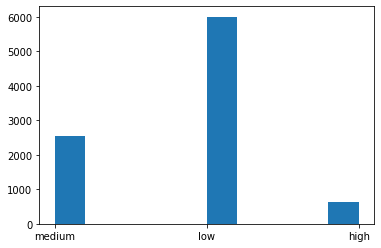

In [268]:
plt.hist(interest_pet_amenities)
plt.show()

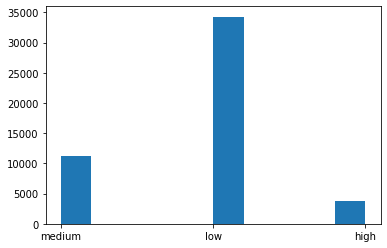

In [270]:
# Raw data
plt.hist(data.interest_level)
plt.show()

In [271]:
interest_access = []
for index, row in data.iterrows(): 
    if (data.accessability[index]):
        interest_access.append(data.interest_level[index])


# rental property that is accessable (doorman, elevator)

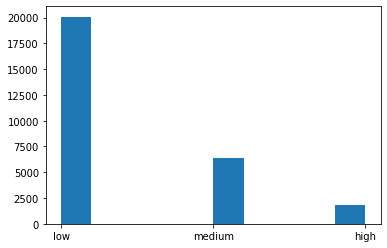

In [272]:
plt.hist(interest_access)
plt.show()

# rental propert that is accessible, has fitness, pet friendly, pool, 

In [273]:
interest_everything = []
for index, row in data.iterrows(): 
    if (data.amenities[index] and data.pet_friendly[index] and data.accessability[index] and data.pool[index] and data.fitness[index]):
        interest_everything.append(data.interest_level[index])


1160


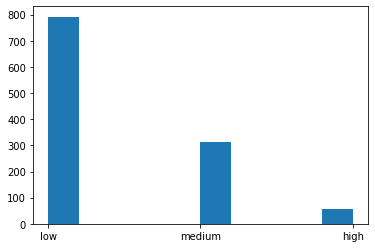

In [276]:
print(len(interest_everything))
plt.hist(interest_everything)
plt.show()

In [255]:
# plt.hist(interestAccess)
# plt.show()
print(data.interest_level.value_counts())
# print(data.interest_level.count('medium'))
# print(data.interest_level.count('high'))

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64


In [277]:
data.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,photos,price,street_address,interest_level,feature_len,pet_friendly,amenities,fitness,pool,accessability
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,7,True,True,False,False,False


In [161]:
data['feature_len'] = data.features.apply(len)
data.head(1)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,feature_len
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,7


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
 15  pet_friendly     49352 non-null  bool   
 16  amenities        49352 non-null  bool   
 17  fitness    

In [20]:
low_int = data[data['interest_level'] == 'low']['bathrooms'].value_counts()
low_int

1.0     26581
2.0      5566
3.0       671
1.5       605
0.0       306
2.5       274
4.0       150
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

# Box chart for categorical features


In [22]:
def bar_chart(feature):
    low_int = data[data['interest_level'] == 'low'][feature].value_counts()
    med_int = data[data['interest_level'] == 'medium'][feature].value_counts()
    high_int = data[data['interest_level'] == 'high'][feature].value_counts()
    df = pandas.DataFrame([low_int, med_int, high_int])
    df.index = ['low','medium','high']
    df.plot(kind='bar', stacked = True, figsize=(10,5))

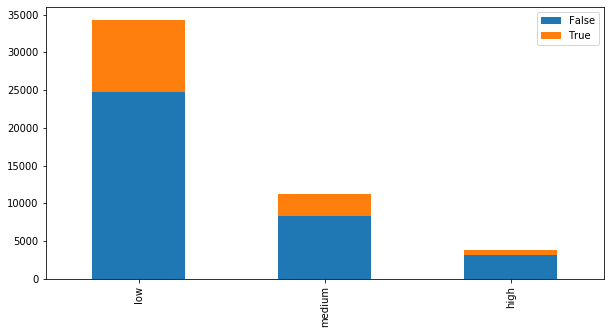

In [34]:
bar_chart('fitness')

# Pet-Friendly generates a lot of low and medium level interest

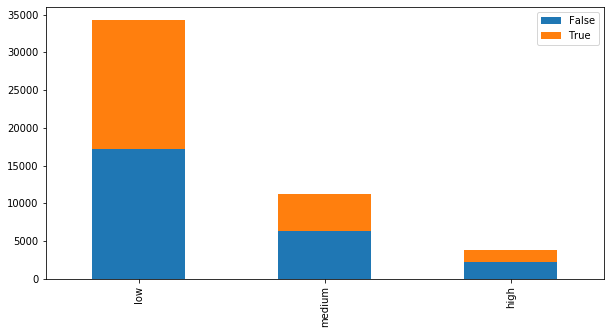

In [35]:
bar_chart('pet_friendly')

# Almost half of medium and 35-40% of high level interest postings have amenities!!

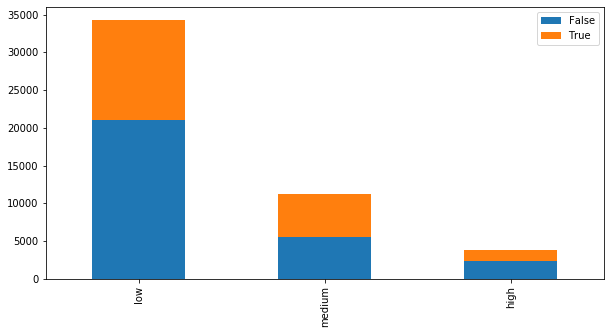

In [37]:
bar_chart('amenities')

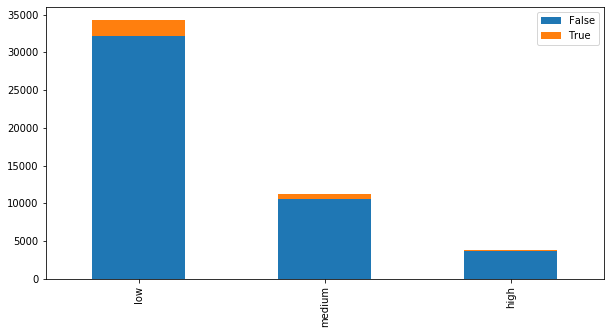

In [38]:
bar_chart('pool')

# Accessability generates tons of low level interest and half of high level interest!!

Accessability is defined as having access to elevator, and doorman.. it makes sense most apartments would have an elevator

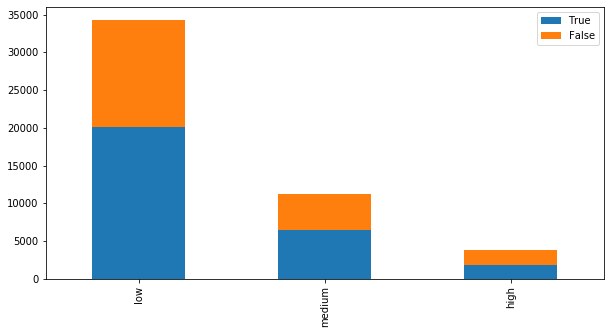

In [39]:
bar_chart('accessability')

# Pre-war does not generate a lot of interest it seems

Pre-war means that the building was built before the war

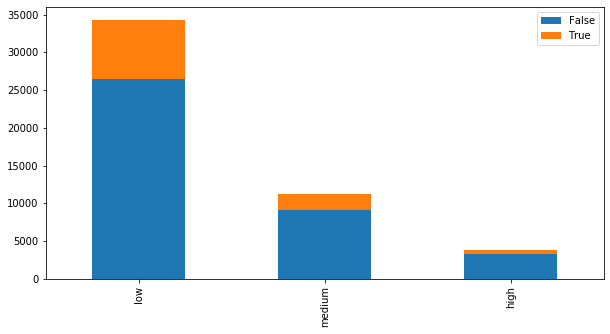

In [41]:
bar_chart('pre_war')

# TODO classify prices into ranges 2000->2500, 2501->3000, 3000->4000, etc. and then do barplot

# Image Data Extraction

Create dataframe with listing_id and RGB values 

In [ ]:
#Create dataframe with listing_id and RGB values
rgbList = []
for i in range(3):
    for j in range(256):
        key = str(i) + str(j)
        rgbList += [key]
rgbList += ['listing_id']
rgbFrame = pandas.DataFrame(columns = rgbList)
rgbFrame.set_index('listing_id')
#print(rgbList)
for i in range(len(ls)):
    rgbFrame.loc[i] = [0]*768 + [ls[i]]
print(rgbFrame.head())

For each image corresponding to listing_ID update the RGB value in the rgbFrame

In [ ]:
#For each image corresponding to listing_ID update the RGB value in the rgbFrame
rootdir = r'C:\Users\HP\Documents\cmpt 459 Kaggle\images_sample\images_sample'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        print(os.path.join(subdir, file))
        gray = cv2.imread(os.path.join(subdir, file),cv2.IMREAD_COLOR)
        
        for i in range(gray.shape[0]):
            for j in range(gray.shape[1]):
                count = 0
                for x in np.nditer(gray[i][j]):
                    
                    key = str(count) + str(x)
                    rgbFrame.at[(rgbFrame.index[rgbFrame['listing_id'] == int(subdir[-7:])])[0], key] += 1
                    count = count + 1

#Update the orginal dataframe with extracted data

In [ ]:
#set index for the two dataframes and update from the second based on listing_id
data_left = data.set_index('listing_id')
rgb_right = rgbFrame.set_index('listing_id')

data_left.update(rgb_right)
data_left.reset_index(inplace=True)

In [ ]:
#to view few of the rows after updating
data_left[data_left['listing_id'].isin([6811957, 6812033])]

# Feature Data Extraction

Find the unique features
Note: "features" are not only predefined keywords. Many strings, delimitted by punctuation or space, are also in it.

In [ ]:
#To see the different unique features
featureSet = set()
for row in data.features:
    for item in row:
        featureSet.add(item.lower())
print((list(featureSet)))

Imports for text processing

In [ ]:
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

Create string out of List:

In [ ]:
def listToString(row):
    my_string = ' '.join(row['features'])
    return my_string

data['featureString'] = data.apply (lambda row: listToString(row), axis=1)

Scrub the strings:

In [ ]:
#remove punctuation
def noPunct(row):
    noPunctuation = "".join([c for c in row['featureString'] if c not in string.punctuation])
    return noPunctuation.lower()

data['ScrubbedString'] = data.apply (lambda row: noPunct(row), axis=1)

Tokenize the words

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')    
data['tokenizedWords'] = data['ScrubbedString'].apply (lambda x: tokenizer.tokenize(x))

Remove Stopwords

In [ ]:
def removStopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

data['withoutStopwords'] = data['tokenizedWords'].apply(lambda x : removStopwords(x))

Lemmatize the words:

In [ ]:
lemmatizer = WordNetLemmatizer()

def wordLemmatizer(text):
    lemmatizedWord = [lemmatizer.lemmatize(i) for i in text]
    return lemmatizedWord

data['lemmatizedWords'] = data['withoutStopwords'].apply(lambda x : wordLemmatizer(x))

Join the words to get a string:

In [ ]:
def listToString(row):
    my_string = ' '.join(row['lemmatizedWords'])
    return my_string

data['lemmatizedString'] = data.apply (lambda row: listToString(row), axis=1)

In [ ]:
#Save json file
#data.to_json(r'Path to be saved\trainWithLemmatizedFeatures.json')

# Description Stuff

Repeat the process as done for "features"

In [ ]:
#remove punctuation
def noPunct(row):
    noPunctuation = "".join([c for c in row['description'] if c not in string.punctuation])
    return noPunctuation.lower()

data['descTokenizedStr'] = data.apply (lambda row: noPunct(row), axis=1)

#tokenize
tokenizer = RegexpTokenizer(r'\w+')    
data['descTokenizedStr'] = data['descTokenizedStr'].apply (lambda x: tokenizer.tokenize(x))

#remove stopwords
def removStopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

data['descTokenizedStr'] = data['descTokenizedStr'].apply(lambda x : removStopwords(x))

#lemmatize the words
lemmatizer = WordNetLemmatizer()
def wordLemmatizer(text):
    lemmatizedWord = [lemmatizer.lemmatize(i) for i in text]
    return lemmatizedWord

data['descTokenizedStr'] = data['descTokenizedStr'].apply(lambda x : wordLemmatizer(x))

#convert into string
def listToString(row):
    my_string = ' '.join(row['descTokenizedStr'])
    return my_string

data['descTokenizedStr'] = data.apply (lambda row: listToString(row), axis=1)

#remove words not in dictionary
words = set(nltk.corpus.words.words())
def wordsInDict(text):
    engText = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words and len(w)>1)# or not w.isalpha())
    return engText

data['descEnglishTokenizedStr'] = data['descTokenizedStr'].apply(lambda x : wordsInDict(x))

Remove non-english words

In [ ]:
#Remove non-english words
words = set(nltk.corpus.words.words())
def wordsInDict(text):
    engText = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words and len(w)>1)# or not w.isalpha())
    return engText
    
data['descEnglishTokenizedStr'] = data['descTokenizedStr'].apply(lambda x : wordsInDict(x))

In [1]:
#Save json file
#data.to_json(r'C:\Users\HP\Documents\cmpt 459 Kaggle\two_sigma\trainLemmatizedFeaturesAndDesc.json')